# Wine Quality Classification Prediction and Analysis

**Authors:** Ruthy Yao
***

![Banner](./Images/Banner.PNG)

## Overview

This project aims to help Riverwood Wine to accurately predict their red wine products that would be rated as "High-Quality" by the industry body. This would allow a more focused approach on sales and marketing capital allocation. The secondary goal was to understand the drivers of a "High-Quality" wine, so they can target the most important physio-chemical properties for measure and management during the production process. This will ultimately enhance the product quality of Riverwood's wine products.  

To solve the business problems, predicative analysis tested on three classification models was applied. Random Forest algorithm was chosen as the final model based on a well-rounded review on the test scores. The feature importance technique was employed to identify the five most important factors that make a "High-Quality" rating. The quartile analysis was used to identify the value range for each of the top five parameters so Riverwood can use it as a benchmark for quality control during the fermentation process.  


## Business Problem

Riverwood Wine is a renowed winemaker in the industry. Every year, they participate in the industry competition for quality award. Wining the award will greatly enhance their brand value and boost their sales. 

Historically, Riverwood Wine enlisted all their products to the industry competition. To increase their chances of win, they would invest significantly on all products, which is not only costly but also less efficient in using the capital. Moving foreward, Riverwood Wine plans to adopt a more "focused" approach in their sales and marketing spend - they will allocate the capital to only the "high-quality" wines that are most likely to win the industry ward. The management team also want to find out the drivers of high-quality wines, so they can target the prarmeters to be measured and managed during the fermentation process. This will ultimately enhance the quality of their wine products. 

We will look to understand the probability of wines that would be rated as "high-quality" by the industry body and what the drivers are for this, so Riverwood Wine can target the physio-chemical properties that need to measured and managed to secure a "high-quality" rating.

## Exploratory Data Analysis

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance

In [30]:
data = pd.read_csv('data/winequality-red.csv')

In [31]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 1599 data entries. no missing value.

In [34]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Some obervations from the data:
* Features are in different scales.
* `quality` is rated from 3 to 8 with majority of the wines in rate 5 and 6.
* There are some extremely large values in the variables `free sulfur dioxide`, `total sulfur dioxide`.

### Univariate Analysis

In [37]:
columns = pd.Series(data.columns)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

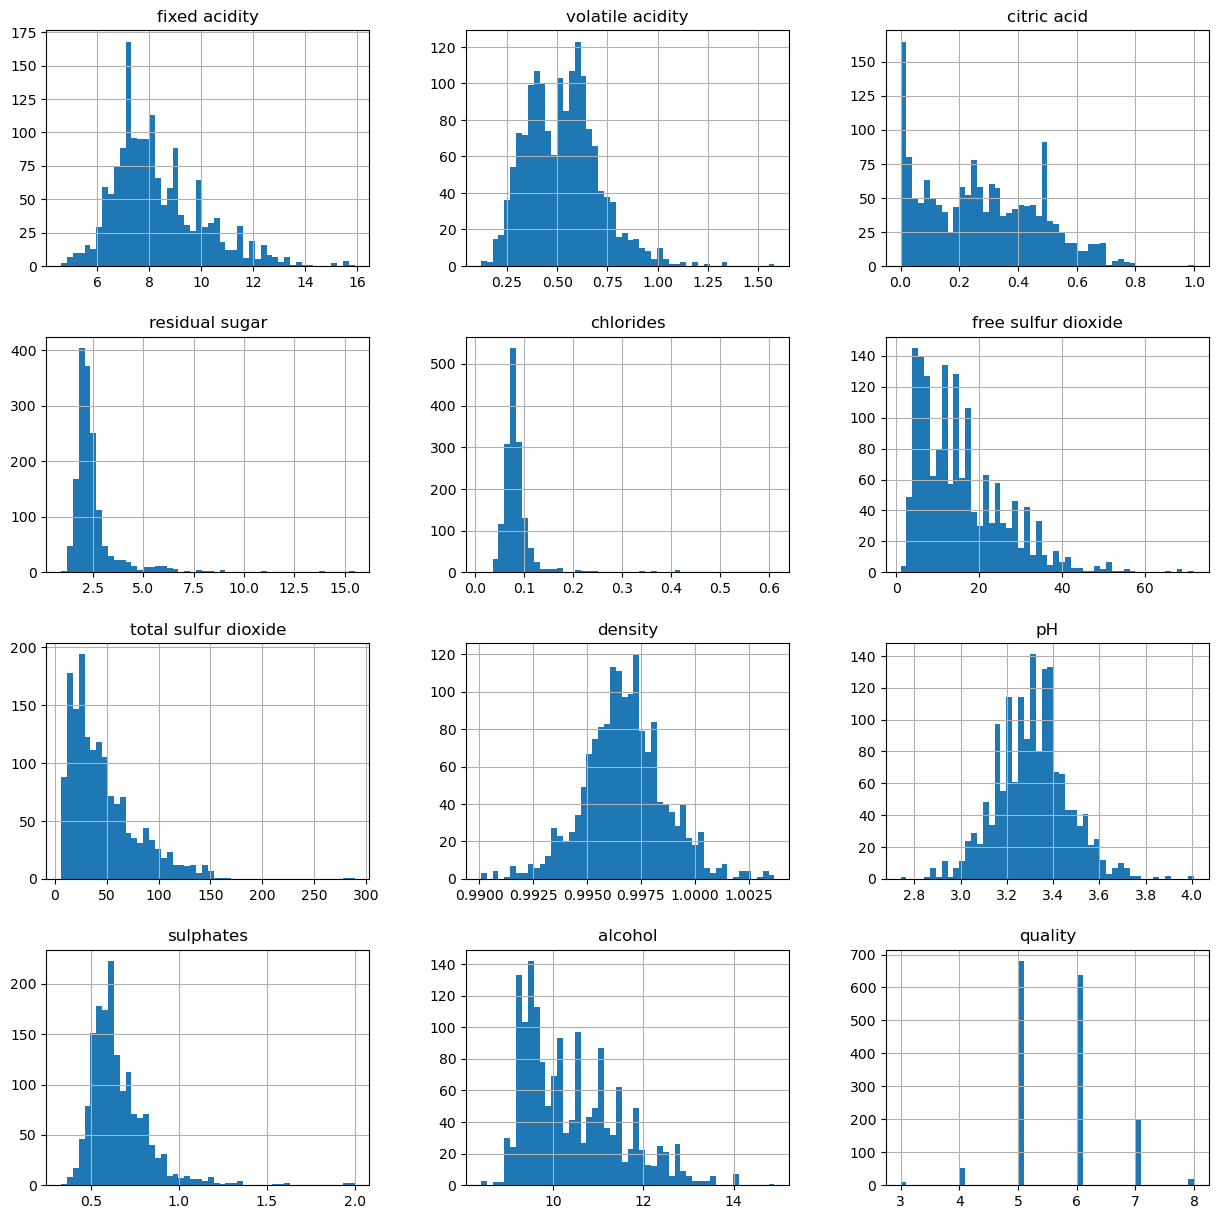

In [38]:
data[columns].hist(bins = 50, figsize  = [15, 15])

Some observations from the plots:
* Most features (other than `density` and `pH`) shows strong skewness.
* Some features have long tails, such as `residual sugar`, `chlorides`.

### Bivariate Analysis

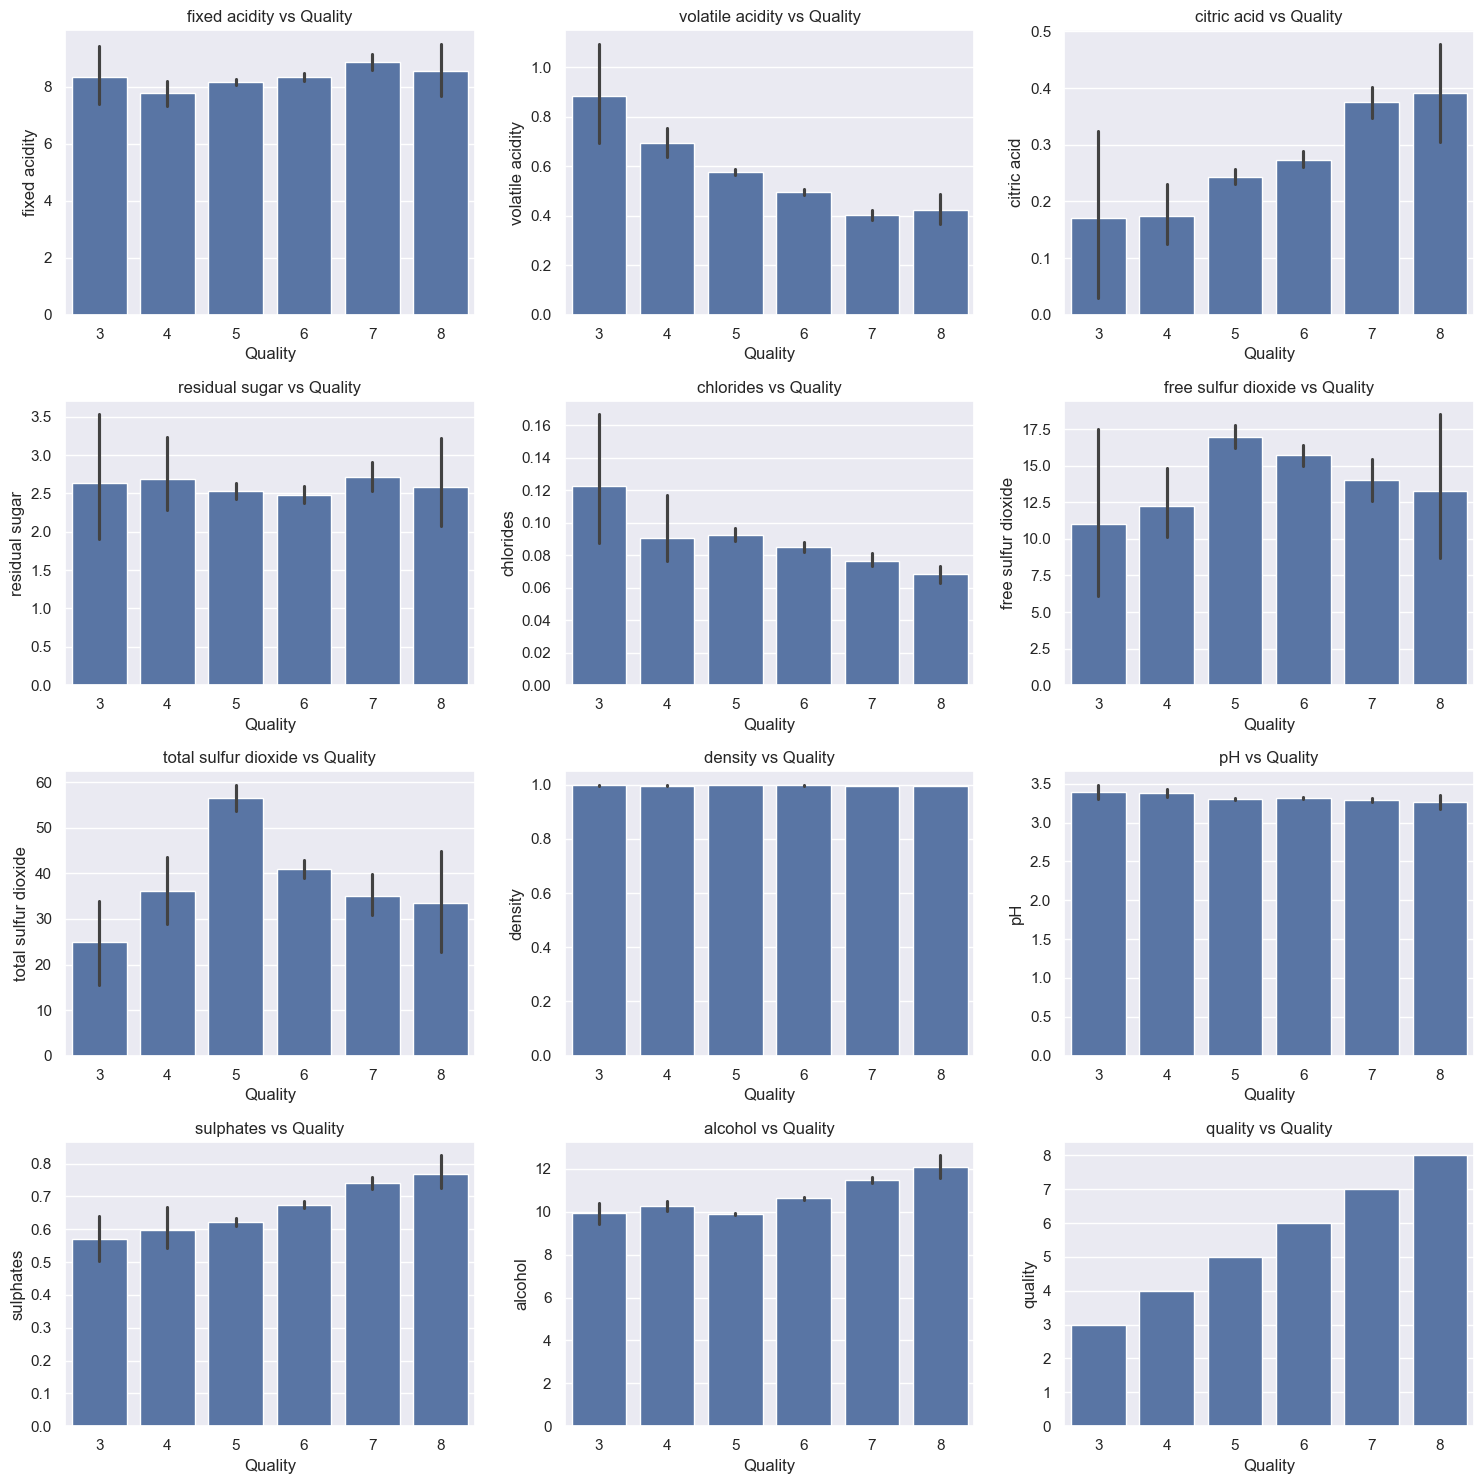

In [41]:
sns.set_theme(color_codes=True)
fig,ax = plt.subplots(nrows = 4,ncols = 3,figsize =(15,15))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.barplot(data=data,y=col,x="quality",ax=ax[i])
    ax[i].set_title(f"{col} vs Quality")
    ax[i].set_xlabel('Quality')
    ax[i].set_ylabel(f"{col}")
    #ax[i].set_ylim(max(data[col]),average(data[col]*1.5))
plt.tight_layout()
plt.show()

Some key insights from the plots:
* High quality wines tend to have high citric acid, high sulphates and alcohol, but low volatile acidity and lower chloride.
* For some features, such as `fixed acidity`, `residual sugar`, `free sulfur dioxide` and `total sulfur dioxide`, there is no clear correlation with the wine quality. Further analysis is needed. 

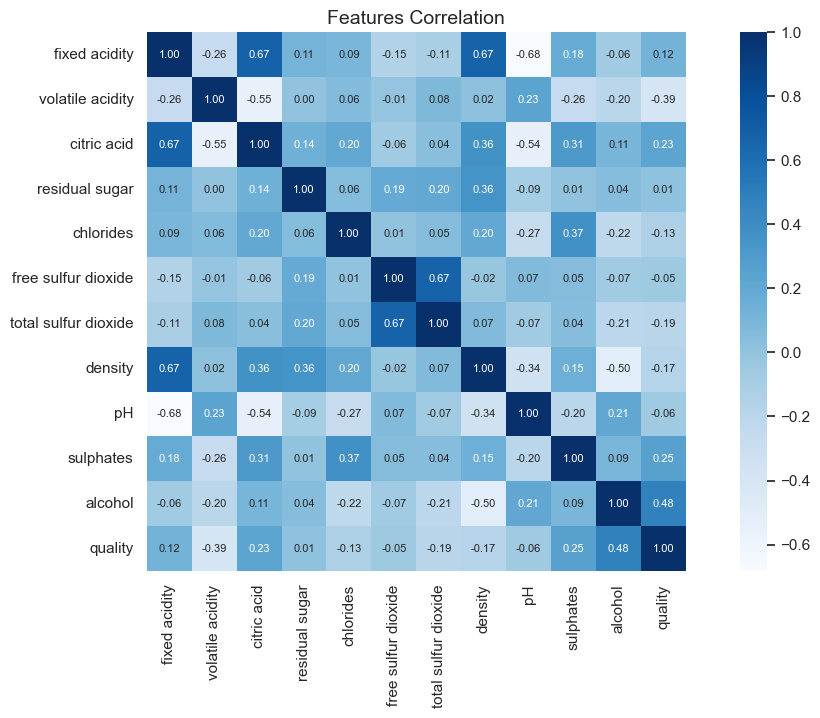

In [43]:
#import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize=(14,7))
heatmap = sns.heatmap(corr_matrix, cbar = True, square=True, fmt = ".2f", annot = True,
           annot_kws = {"size":8}, cmap = "Blues")
heatmap.set_title('Features Correlation', fontsize=14)
plt.savefig('./Images/Features_corr.png', bbox_inches='tight');

Some observations from the correlation heatmap:
* If we use +/-0.6 as a threshhold for strong correlation, there isn't any feature that has strong correlation with the wine quality. Despite of this, `alcohol`,`sulphates`, `citric acid` have the highest postive correlation, whereas `volatile acidity`, `total sulfur dioxide` and `density` have the strongest negative correlation. 
* Some features are correlated with each other. For example, `fixed acidity` with `density`, `chlorides` with `sulphates`.

## Model Development

### Model 1 - Logistic Regression
Build a linear regresion model to predict the quality score and evaluate the model fit.

#### Data Preparation

To solve the the business poroblem of predicting a high-quality wine, I will classify the data into two categories - "high-quality" and "low-quality". the `quality` score of 7 will be used as the threshold. For wines with a `quality` score 7 or above will be classified as "high-quality" and below 7 will be classified as "low-quality".

In [49]:
# convert the quality score to a boolean value with 1 representing 'high-quality' wines and 0 representing a'midiocre' or 'low-quality' wines.
data["quality"] = [1 if x >= 7 else 0 for x in data["quality"]]

In [50]:
data = shuffle(data, random_state = 42)

In [51]:
data['quality'].value_counts(normalize = True)

quality
0    0.86429
1    0.13571
Name: proportion, dtype: float64

The data is not balanced - 86% of the products are "low-quality".

##### Deal with outliers

In [54]:
# By looking at the mean and max value, we think potentially only `free sulfur dioxide` and `total sulfur dioxide` have outliers
outlier_columns = ['free sulfur dioxide','total sulfur dioxide']

In [55]:
# Boxplot approach

for col in outlier_columns:

    lower_quartile = data[col].quantile(0.25)
    upper_quartile = data[col].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 2
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended

    outliers = data[(data[col] < min_border) | (data[col] > max_border)].index
    print(f'{len(outliers)} outliers detected in column {col}')

    data_for_model = data.drop(outliers)

18 outliers detected in column free sulfur dioxide
23 outliers detected in column total sulfur dioxide


In [56]:
# Split input variables and output variables
X = data_for_model.drop(['quality'], axis =1)
y = data_for_model['quality']

In [57]:
# Initiate train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42,stratify = y)

#### Feature Selection

Select the input variables that are most important to the wine quality classification. It will elimiante noise and help the true relationships stand out.  It will also make our model more faster to train and make predictions - lower the computation cost. 

We applied Recursive Feature Elimination With Cross Validation (RFECV) where we split the data into many "chunks" and iteratively trains & validates models on each "chunk" seperatly. This means that each time we assess different model scenarios with different variables included, or eliminated. The algorithm also knows how accurate each of those scenarios is. From the suites of model scenarios that are created, the algorithm can determine which provided the best accuracy and thus can infer the best set of input variables to use.

In [59]:
clf = LogisticRegression(random_state = 42, max_iter = 1000)
feature_selector = RFECV(clf)

In [60]:
fit = feature_selector.fit(X_train,y_train)

In [61]:
optimal_feature_count = feature_selector.n_features_
print(f'Optimal number of features: {optimal_feature_count}')

Optimal number of features: 9


In [62]:
X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]

In [63]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol
595,8.9,0.595,0.41,7.9,0.086,0.99980,3.27,0.57,9.3
787,10.0,0.560,0.24,2.2,0.079,0.99910,3.18,0.56,10.1
1040,7.4,0.965,0.00,2.2,0.088,0.99756,3.58,0.67,10.2
310,10.3,0.530,0.48,2.5,0.063,0.99980,3.12,0.59,9.3
1469,7.3,0.980,0.05,2.1,0.061,0.99705,3.31,0.55,9.7


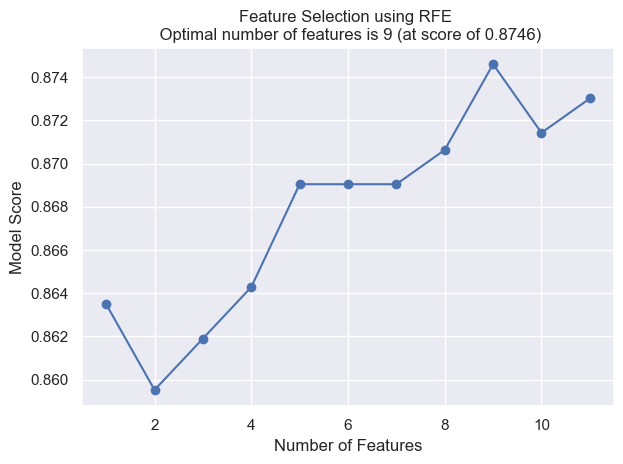

In [64]:
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.savefig('./Images/optimal_num_features.png', bbox_inches='tight');
plt.show()

The optimal number of features are 9. `free sulfur dioxide` and `total sulfur dioxide` are elimiated.

#### Model Training

In [67]:
clf =LogisticRegression(random_state = 42, max_iter = 1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Model Assessment

In [69]:
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

##### Confusion Matrix 

Confusion Matrix provides us a visual way to understand how our predictions match up against the actual values for those test set observations. 

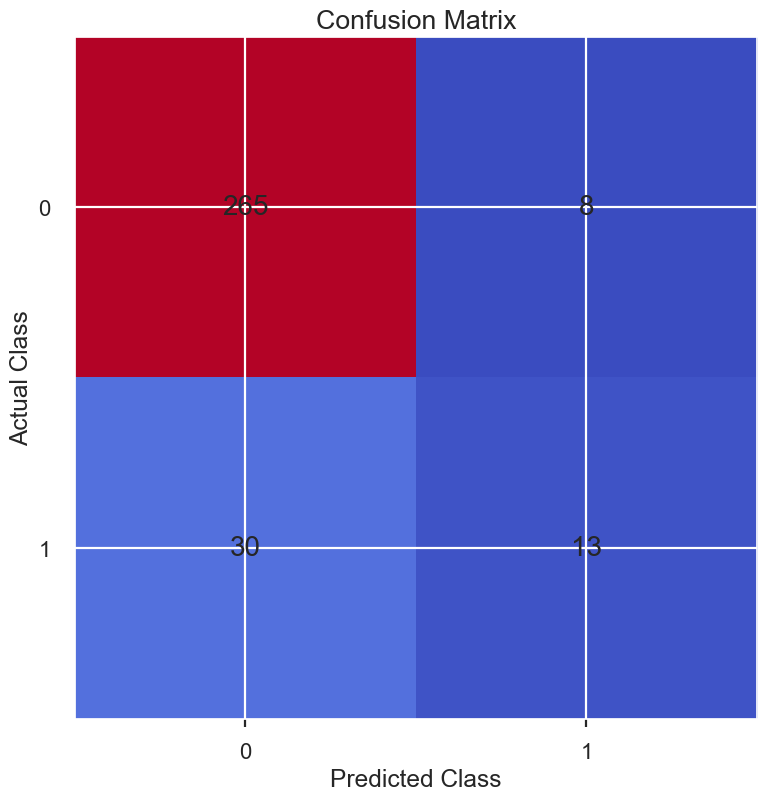

In [71]:
# The below code creates the Confusion Matrix using the confusion_matrix functionality from sckikit-learn and then plots it using matplotlib.

conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.style.use("seaborn-v0_8-poster")
plt.matshow(conf_matrix, cmap = 'coolwarm')
plt.gca().xaxis.tick_bottom()
plt.title('Confusion Matrix')
plt.ylabel("Actual Class")
plt.xlabel('Predicted Class')
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value, ha = 'center', va = 'center', fontsize = 20)
plt.savefig('./Images/conf_matrix_logistic.png', bbox_inches='tight');
plt.show()

The aim is to have a high proportion of observations falling into the top left cell(predicted mediocre wine and actual mediocre wine) and the bottom right cell(predicted high-quality wines and actual high-quality wines).

Since the proprtion of high-quality wines in our dataset was around 14:86, we will be looking at not only Classification Accuracy, but also Precision, Recall and F1-sore which will help us evaluate how well our model has performed in reality.

##### Classification Performance Metrics

In [74]:
def cal_score(ytest,ypred):
    accuracy = round(accuracy_score(ytest,ypred),4)
    precision = round(precision_score(ytest,ypred),4)
    recall = round(recall_score(ytest,ypred),4)
    f1 = round(f1_score(ytest,ypred),4)

    result = [accuracy, precision, recall, f1]
    return result

In [75]:
scores = cal_score(y_test, y_pred_class)
score_name = ['Accuracy Score','Precision Score','Recall Score', 'F1 Score']
scorecard = pd.DataFrame(scores,score_name).transpose()
scorecard

,Accuracy Score,Precision Score,Recall Score,F1 Score
0,0.8797,0.619,0.3023,0.4062


- **Accuracy** - Accuracy tells us of all predicted observations, what proportion did we correctly classify. This is very intuitive. But when dealing with inbalanced classes, it can be misleading.
- **Precision** - Precision tells us of all observations that we were predicted as "high-quality", how many actually were high-quality.
- **Recall** - Recall tells us of all high-quality wines, how many did we predicted correctly as "high-quality".
- **F1 score** - F1 score eseentially combines PRecision and Recall. It is the harmonic mean of these two metrics. A good or hgih F1-score coems when there is balance between Precion and Recall. 

Since our data is inbalanced, looking at these metrics rather than just Classification Acuracy on it's own is a good idea. It gives us a much better understand of what our prediction mean. We will use these same metrics when applying other models for this project and compare how they stack up. 

##### Finding the Optimal threshold

By default, most classification models will just use a 50% probability to discern between a positive class prediction (high-quality rating) and a negative class prediction (mediocre rating). 

However, 50% as the default may not be the best threshold for our task.

Here, we will test many potential classification thresholds, and plot the Precision, Recall & F1-score, and find an optimal solution.

In [78]:
thresholds = np.arange(0,1,0.01)

precision_scores =[]
recall_scores =[]
f1_scores =[]

for threshold in thresholds:
    
    pred_class = (y_pred_prob >= threshold) * 1
    
    precision = precision_score(y_test,pred_class, zero_division = 0)
    precision_scores.append(precision)

    recall = recall_score(y_test,pred_class)
    recall_scores.append(recall)

    f1 = f1_score(y_test,pred_class)
    f1_scores.append(f1)

max_f1 = max(f1_scores)
max_f1_idx = f1_scores.index(max_f1)

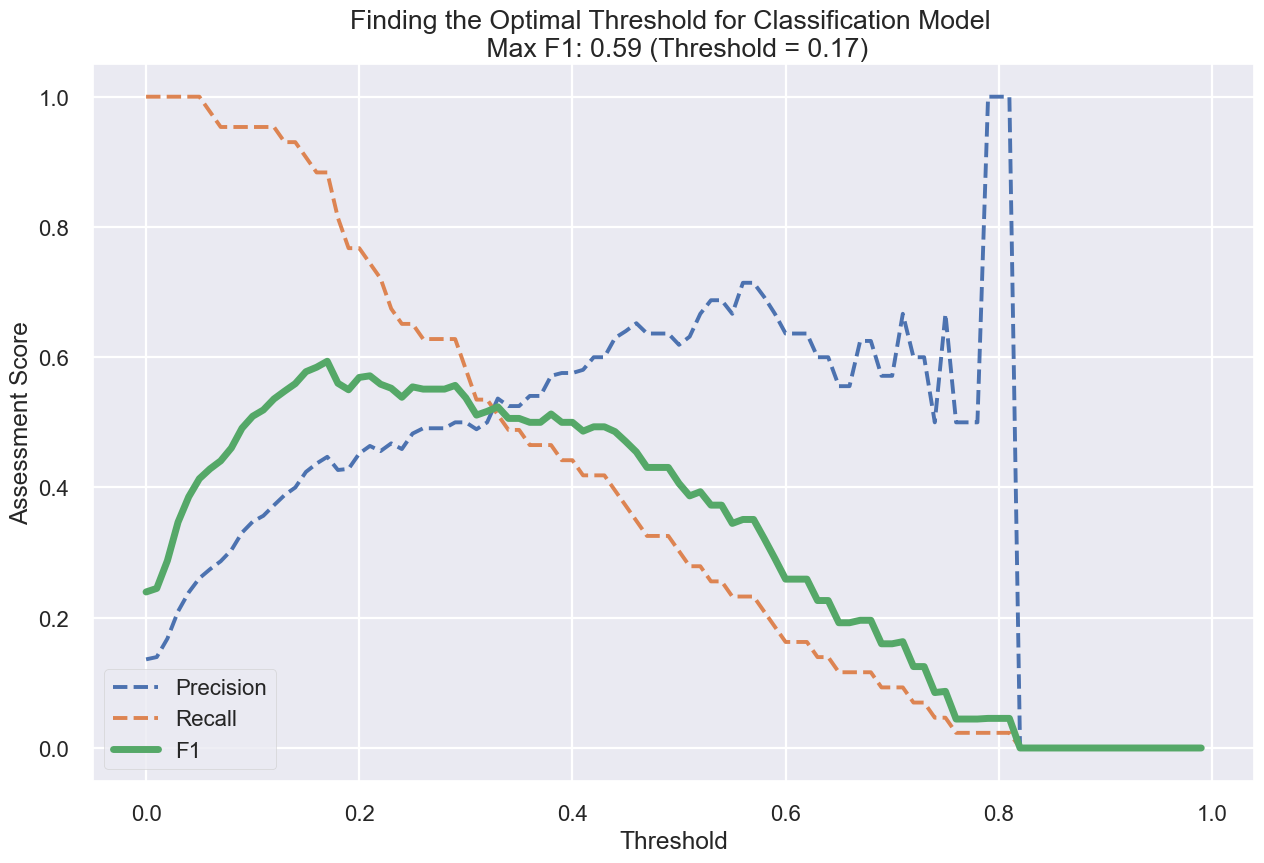

In [79]:
#plot the result.
plt.style.use('seaborn-v0_8-poster')
plt.plot(thresholds, precision_scores, label = 'Precision', linestyle = '--')
plt.plot(thresholds, recall_scores, label = 'Recall', linestyle = '--')
plt.plot(thresholds, f1_scores, label = 'F1', linewidth = 5)
plt.title(f"Finding the Optimal Threshold for Classification Model \n Max F1: {round(max_f1,2)} (Threshold = {round(thresholds[max_f1_idx],2)})")
plt.xlabel('Threshold')
plt.ylabel('Assessment Score')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.savefig('./Images/optimal_threshold.png', bbox_inches='tight');
plt.show()

Along the x-axis of the above plot we have the different thresholds that were testing. Along the y-axis we have the performance score for each of our three metrics. As per the legend, we have Precision as a blue dotted line, Recall as an orange dotted line, and F1-score as a thick green line. We can see the "zero_sum" relationship between Precision & Recall. 

In this plot, the maximum F1 score is 0.59 and this was obtained at a classification threshold of 0.17. This means that we would classify a wine as "high-quality" if the predicted probability is 0.17 or above. By setting up the threshold as 0.17, the model performs the best (F1-score 0.59 vs 0.41 on the default threshold of 0.50).

Let's train other models to see if we can improve the quality of the prediction.

### Model 2 - Decision Tree

For Decision Tree model, we don't need to consoider the impact from outliers.

In [83]:
# Split input variables and output variables
X = data.drop(['quality'], axis =1)
y = data['quality']

In [84]:
# Initiate train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42,stratify = y)

#### Model Training

In [86]:
clf =DecisionTreeClassifier(random_state = 42, max_depth = 5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

#### Model Assessment

In [88]:
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [89]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

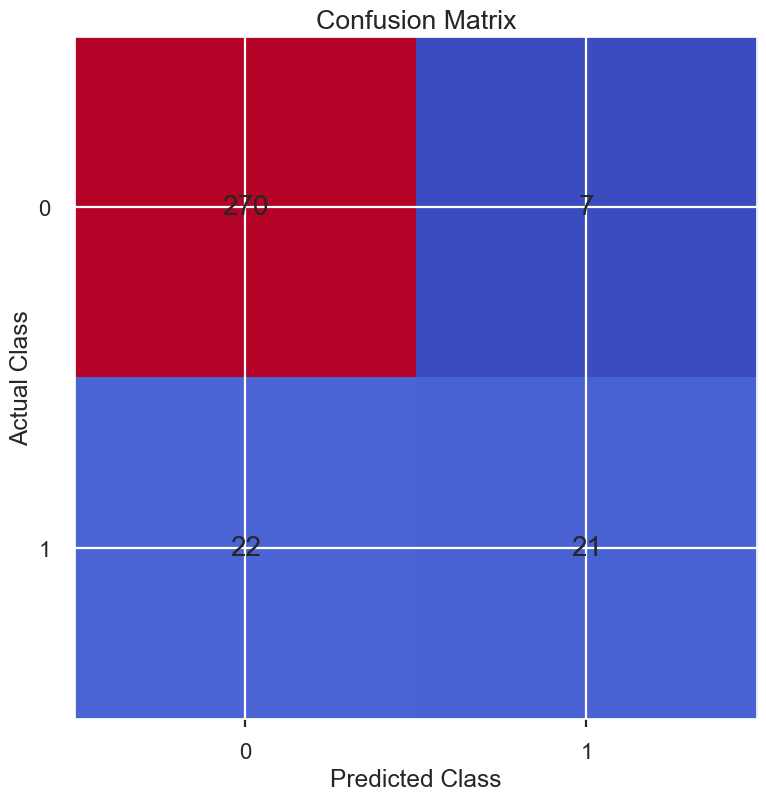

In [90]:
plt.style.use("seaborn-v0_8-poster")
plt.matshow(conf_matrix, cmap = 'coolwarm')
plt.gca().xaxis.tick_bottom()
plt.title('Confusion Matrix')
plt.ylabel("Actual Class")
plt.xlabel('Predicted Class')
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value, ha = 'center', va = 'center', fontsize = 20)
plt.savefig('./Images/conf_matrix_tree.png', bbox_inches='tight');
plt.show()

In [91]:
scores = cal_score(y_test, y_pred_class)
scorecard.loc[len(scorecard)] = scores
scorecard

,Accuracy Score,Precision Score,Recall Score,F1 Score
0,0.8797,0.619,0.3023,0.4062
1,0.9094,0.750,0.4884,0.5915


Decision tree model performs better in all the scores than the Logistic Regression Model.

##### Find the best 
Decision Tree can be prone to over-fitting. In other words, without any limits on their splitting, they will end up learning the training data perfectly. We would much prefer our model to have a more generalised set of rules, as this will be more robust & reliable when making predictions on new data. 

One effective method of avoiding this over-fitting, is to apply a max depth to the Decision Tree, meaning that we only allow it to split the data a certain number of times before it is required to stop.

We initially trained our model with a placeholder depth of 5, but unfortunately, we don't necessarily know the optimal number for this. Below we will loop over a variety of values on depth and assess which gives us the best predictive performance.

In [94]:
max_depth_list = list(range(1,15))
accuracy_scores = []

for depth in max_depth_list:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = f1_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]

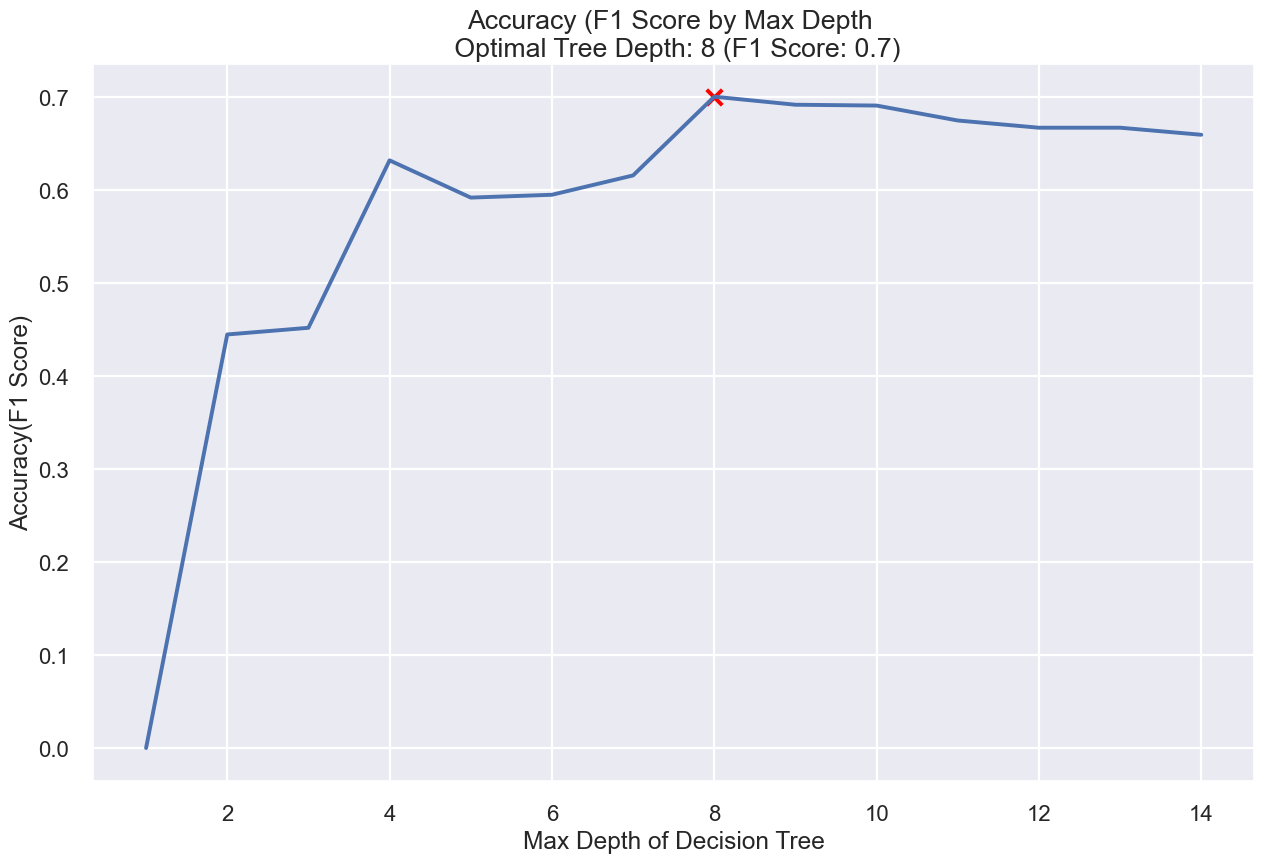

In [95]:
# Plot the max depths
plt.plot(max_depth_list,accuracy_scores)
plt.scatter(optimal_depth, max_accuracy, marker = 'x', color = 'red')
plt.title(f"Accuracy (F1 Score by Max Depth \n Optimal Tree Depth: {optimal_depth} (F1 Score: {round(max_accuracy,4)})")
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Accuracy(F1 Score)")
plt.tight_layout()
plt.savefig('./Images/optimal_tree_depth.png', bbox_inches='tight');
plt.show()

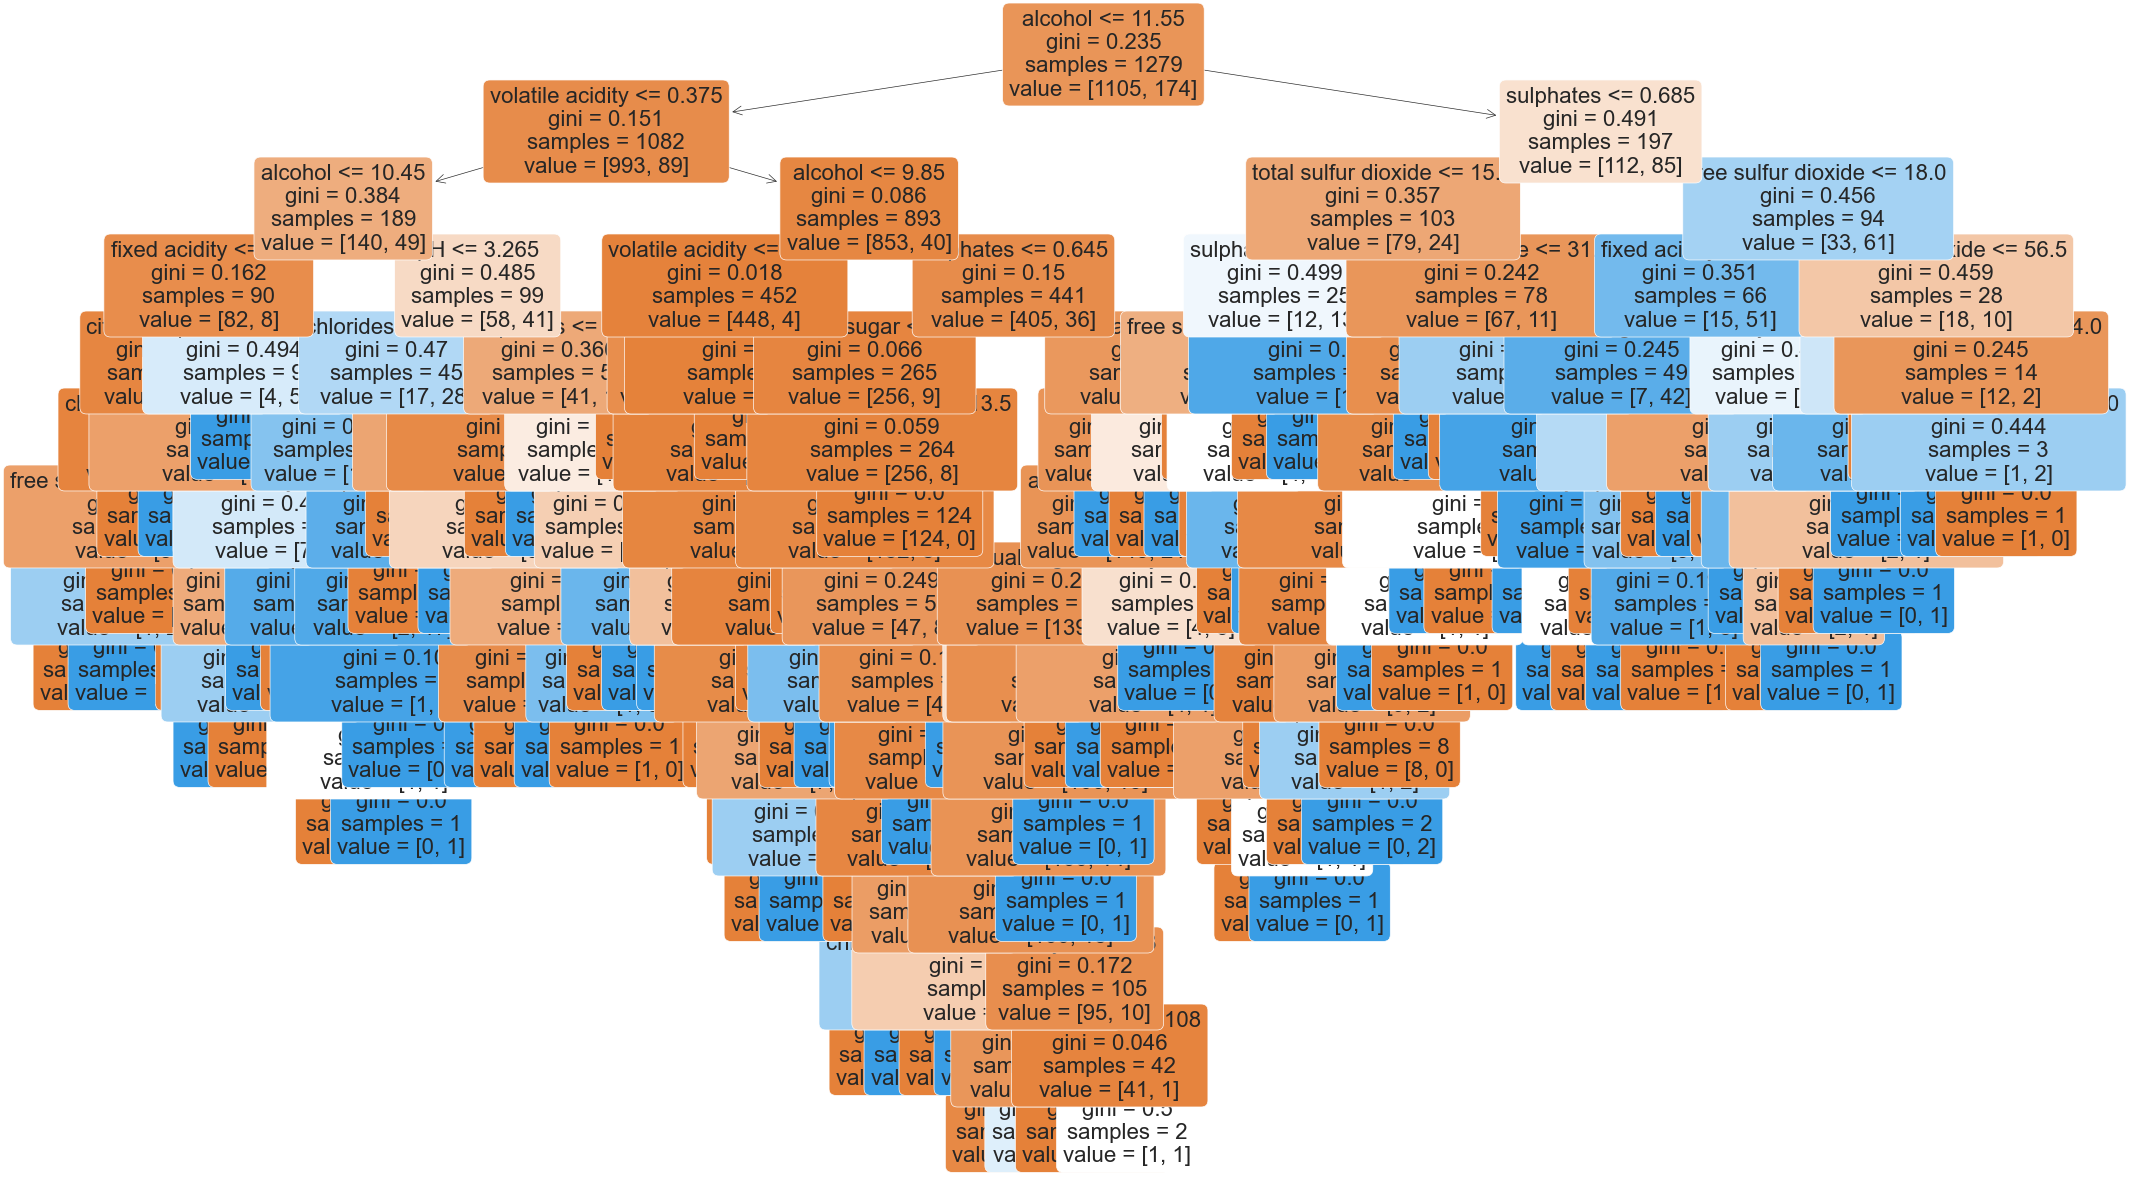

In [96]:
# plot our model
plt.figure(figsize=(25,15))
tree = plot_tree(clf,
                 feature_names = X.columns,
                 filled = True,
                 rounded = True,
                 fontsize = 16)

The optimal tree depth is 8, which takes our F1-score up to 0.7.

### Model 3 - Random Forest

Random Forest Model doesn't need to worry about outliers either.

In [100]:
# Split input variables and output variables
X = data.drop(['quality'], axis =1)
y = data['quality']

In [101]:
# Initiate train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42,stratify = y)

#### Model Training

In [103]:
clf =RandomForestClassifier(random_state = 42, n_estimators = 500, max_features = 5)
clf.fit(X_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=500, random_state=42)

#### Model Assessment

In [105]:
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

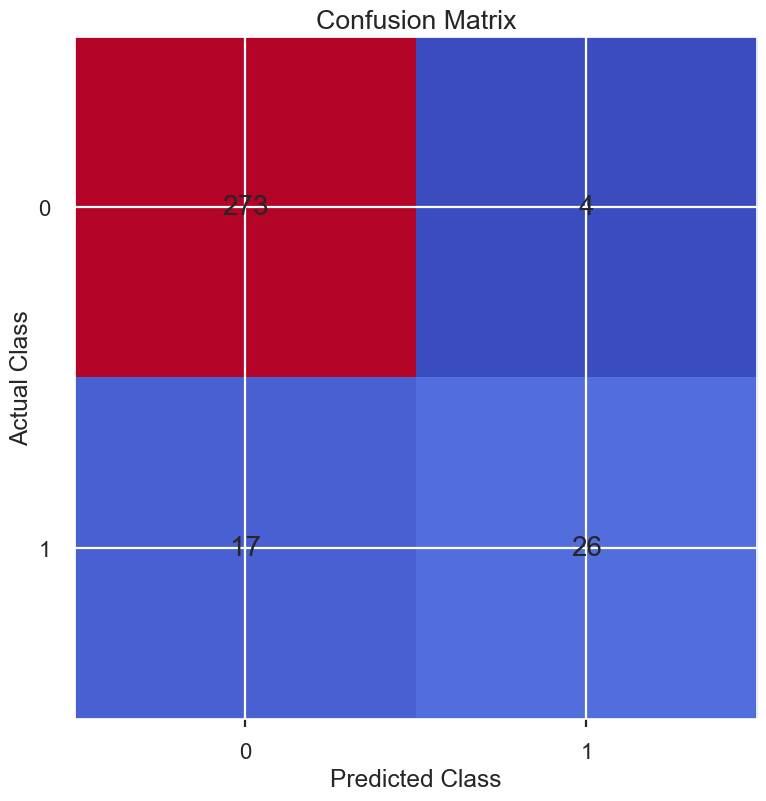

In [106]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.style.use("seaborn-v0_8-poster")
plt.matshow(conf_matrix, cmap = 'coolwarm')
plt.gca().xaxis.tick_bottom()
plt.title('Confusion Matrix')
plt.ylabel("Actual Class")
plt.xlabel('Predicted Class')
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value, ha = 'center', va = 'center', fontsize = 20)
plt.savefig('./Images/conf_matrix_random.png', bbox_inches='tight');
plt.show()

In [107]:
scores = cal_score(y_test, y_pred_class)
scorecard.loc[len(scorecard)] = scores
scorecard

,Accuracy Score,Precision Score,Recall Score,F1 Score
0,0.8797,0.6190,0.3023,0.4062
1,0.9094,0.7500,0.4884,0.5915
2,0.9344,0.8667,0.6047,0.7123


Random Forecast model performs the best among the three algorithms with a F1 score of 0.71.

#### Feature Importance

At a high level, we measure feature importance by asking how much would accuracy decrease if a specific input variable was removed or randomised. Feature Importance is where find all nodes in the Decision Trees of the forest where a particular input variable is used to split the data and assess what the gini impurity score was before the split was made vs after the split was made. We then take the average of these improvements across all Decision Trees in the Random Forest to get a score that tells us how much better we're making the model by using that input variable. 

If we do this for each our input variables, we can compare these scores and understand which is adding the most value to the predictive power of the model.

Let's use this method to find the score for each of the physio-chemical properties in the dataset and rank them from the highest to the lowest. 

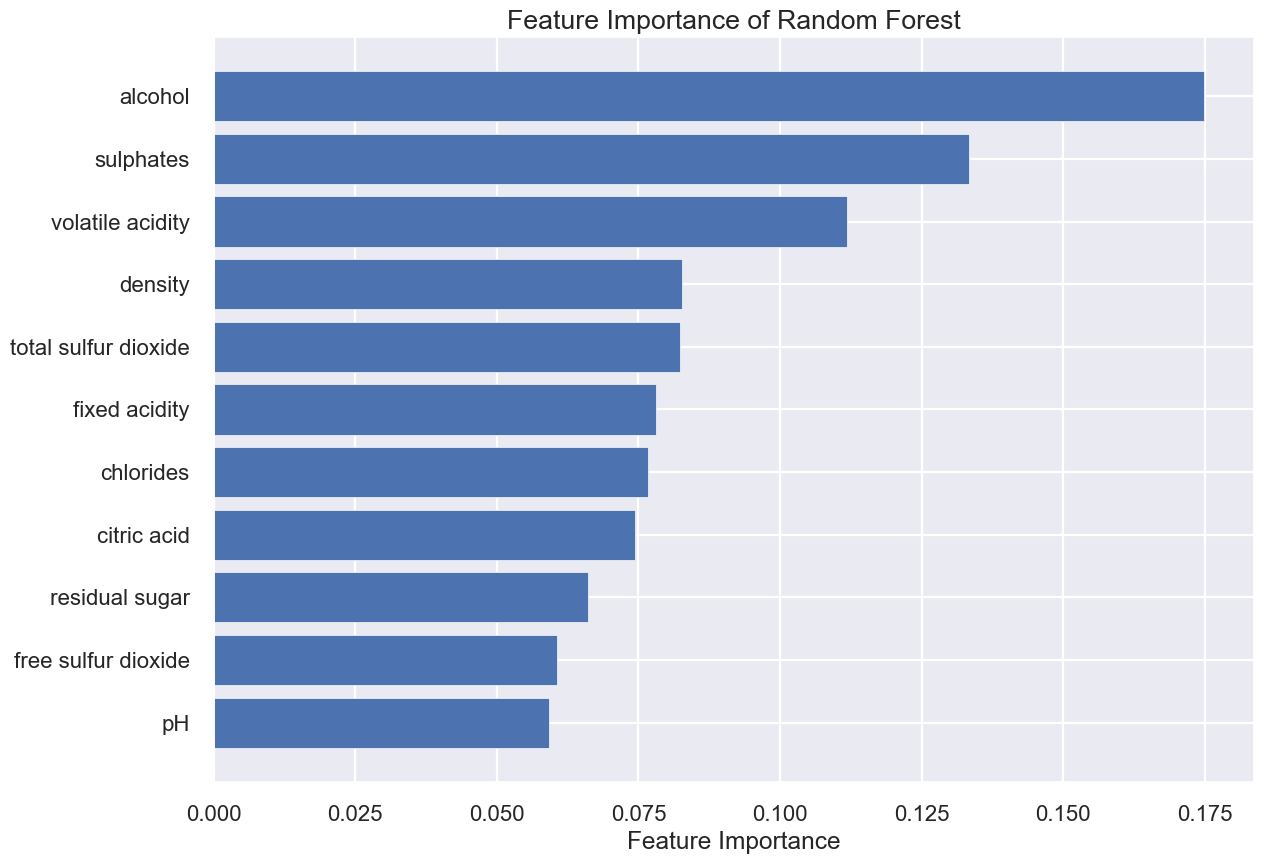

In [110]:
feature_importance = pd.DataFrame(clf.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names, feature_importance], axis =1)
feature_importance_summary.columns = ['input_variable','feature_importance']
feature_importance_summary.sort_values(by = 'feature_importance', inplace = True)

plt.barh(feature_importance_summary['input_variable'], feature_importance_summary['feature_importance'])
plt.title('Feature Importance of Random Forest')
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.savefig('./Images/feature_importance_random.png', bbox_inches='tight');
plt.show()

The top five important parameters for a high-quality wine are `alcohol`, `sulphates`,`volatile acidity`,`density`,`total sulfur dioxide`.

Let's further investigate how those features differentiate a "high-qulity" wine vs a "mediocre" wine.

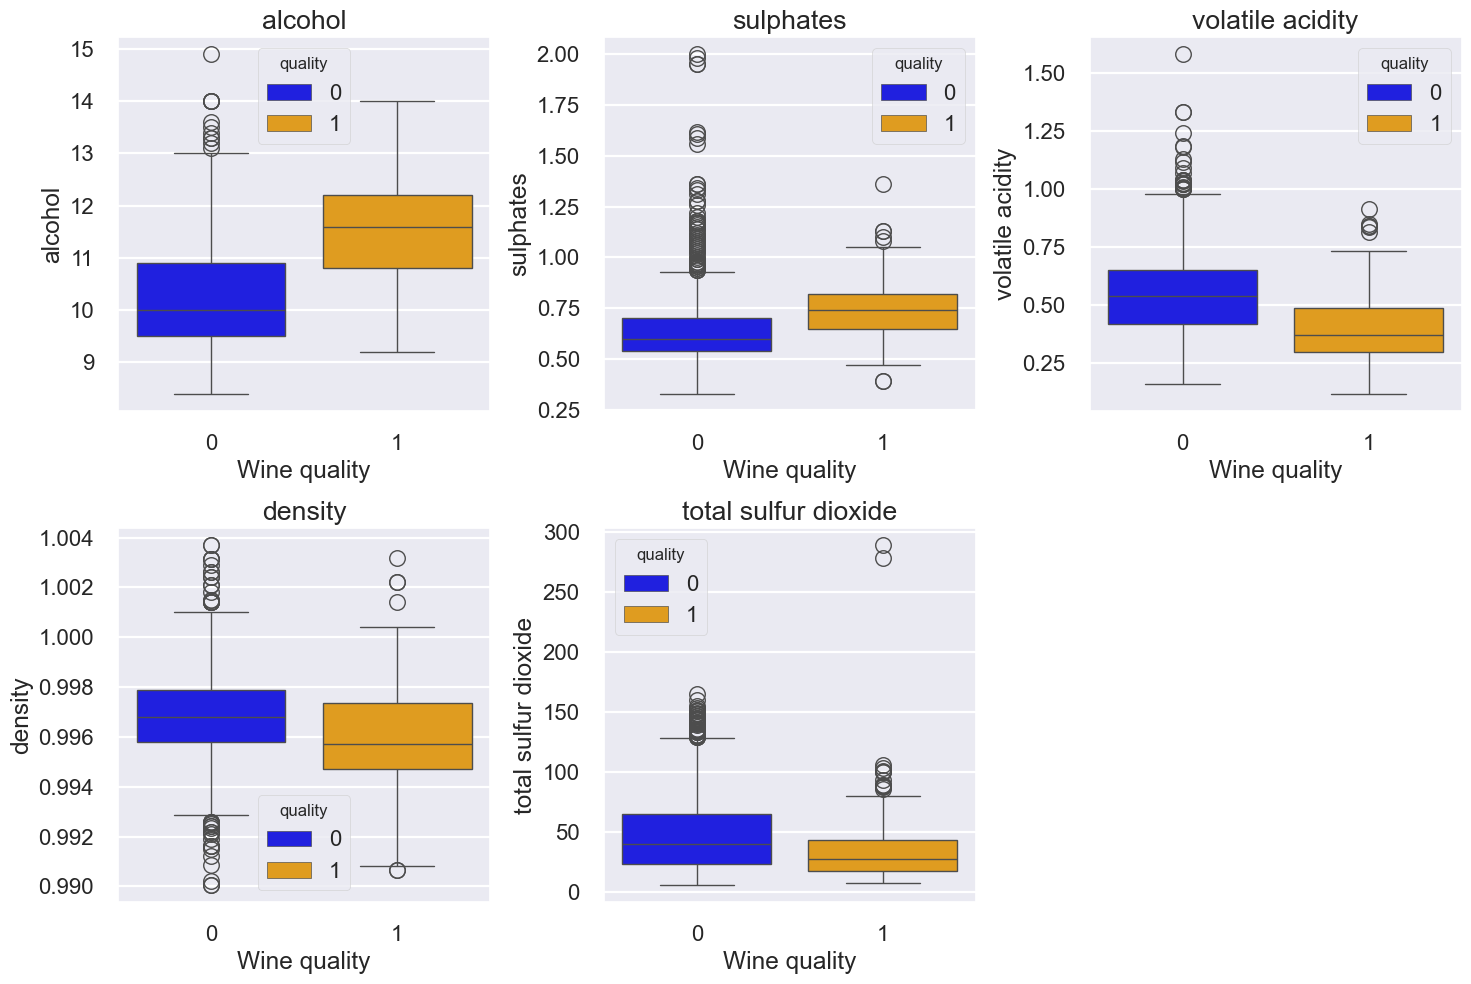

<Figure size 1280x880 with 0 Axes>

In [113]:
# Boxplots for the top five features split by wine quality
columns = ['alcohol','sulphates','volatile acidity','density','total sulfur dioxide']
color=['Blue','Orange']
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='quality', y=col, data=data,palette=color, hue=y)
    plt.title(f'{col}')
    plt.xlabel('Wine quality')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
plt.savefig('./Images/features_quartile_distr_classif.png', bbox_inches='tight');

In [114]:
high_quality = data.loc[data['quality'] ==1]
low_quality = data.loc[data['quality'] ==0]

In [115]:
high_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,1.0


In [116]:
low_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,0.0


Using the interquartile range (IQR) where most of the data lies to represent the desirable range of each parameter for the two wine classes. As we can see from the boxplot and the quartile statistics,  the high-quality wines is featured with 
* Higher alcohol - spreading within 10.8 and 12.2 with a median value of 11.6 as compared with low-quality wines spreading between  9.5 and 10.9 with a median value of 10.0.
* Higher sulphates - spreading between 0.65 and 0.86 with a median value of 0.74 vs low-quality wines spreading between 0.54 and 0.7 with a median value of 0.60.
* Lower volatile acidity spreading between 0.3 and 0.49 with an median value of 0.37 vs low-quality wines spreading between 0.42 and 0.65 with an median value of 0.54.
* Lower density spreading between 0.9947 and 0.9974 with a median value of 0.9957 vs low-quality wine between 0.9958 and 0.9979 with a median value 0.9968.
* Lower total sulfur dioxide spreading between 17 and 43 with a median value of 27 vs low-quality wines between 23 and 65 with an median value of 39.5.

#### Test with new data

In [119]:
new_data = [9.7,0.33,0.46,1.5,0.056,9,24,0.9970,3.22,0.82,10.3]

In [120]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [121]:
new_data = pd.DataFrame(new_data, columns).transpose()
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.7,0.33,0.46,1.5,0.056,9.0,24.0,0.997,3.22,0.82,10.3


In [122]:
y_pred_class_new_data = clf.predict(new_data)
y_pred_class_new_data

array([1], dtype=int64)

## Results and Insights

The goal for the project was to build a model that would accurately predict the wine products that would be classified as "High-Quality". This would allow for a much more focused approach for the sales and marketing investment. A secondary goal was to understand what the drivers for this are, so Rierwood Wine can get closer to the physio-chemical properties that need to be measured and managed in order to enhance the quality of their products. 

Based upon these, the chosen model is Random Forecast as it was 

1. The most consistently performant on the test dataset across classification accuracy (93.4%), precision(86.7%), recall(60.5%) and F1-score(71.2%).
2. The feature importance allows us to better understand the key drivers befind the "high-quality" rating. 

Specifically, the top five parameters are - `alcohol`,`sulphates`,`volatile acidity`,`density`,`total sulfur dioxide`. And their desirable value ranges are

* Alcohol to control in a level between 10.8 and 12.2;
* Sulphates to control in a level between 0.65 and 0.86;
* Volatile acidity to control between 0.3 and 0.49;
* Density to control between  0.9947 and 0.9974;
* Total sulfur dioxide to control between 17 and 43.

### Next Steps

Further analyses could yield additional insights to further improve the prediction at Riverwood Wine.
    
- **Enlarge the sample size** - This dataset has only 1599 entires of the wine product with only ~230 classified as "high-quality". Enlarge the sample size will improve the predicative accuracy.

- **Analyse the interacted features** - Some physicochemical properties are interdependent. Build interaction features will improve the predicative power. 

- **Prepare for the model deployment** - Further analysis on what fermentation techniques and how to implement the techniques to control the physio-chemical properties in the desirable range will prepare us for the implementation of those analytical insights in the real world practice. 